In [23]:
import pandas as pd # data cleaning and pre processing
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity #  finding similarity between the each course 
from sklearn.feature_extraction.text import TfidfVectorizer  # Converting to vectors


In [64]:
# read the dataset from  kaggle
df= pd.read_csv('udemy_data.csv')
# dropping nulll values
df=df.dropna()
df.isna().sum()

id                    0
title                 0
is_paid               0
price                 0
headline              0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
published_time        0
last_update_date      0
category              0
subcategory           0
topic                 0
language              0
course_url            0
instructor_name       0
instructor_url        0
dtype: int64

In [65]:
df.shape

(24538, 20)

In [66]:
df.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,825218,PowerPoint Slide Design - Casual Slides Presen...,False,0.00,Create 5 PowerPoint Slides for any Presentatio...,89574,4.586538,5575,1283,11,41,2016-04-19T18:27:55Z,21-02-2022,Office Productivity,Microsoft,PowerPoint,English,/course/powerpoint-slide-design/,Andrew Pach,/user/andrzejpach/
1,245506,Prevent pregnancy naturally - with personal co...,True,199.99,Fertility awareness is a scientifically proven...,17,5.000000,1,0,122,349,2015-01-28T16:42:04Z,27-10-2017,Health & Fitness,General Health,Fertility,English,/course/naturalfertility/,Avishag Zloof,/user/avishagzloof/
2,3350506,ENGLISH MADE EASY GCSE,False,0.00,An Overview of the AQA English Literature GCSE...,2400,3.850000,14,1,5,68,2020-07-25T03:40:45Z,21-07-2020,Teaching & Academics,Other Teaching & Academics,English Literature,English,/course/english-made-easy-gcse/,Dr Ken Baker,/user/kenneth-george-jeffrey-baker/
3,4779156,How to Create and Sell A Brand And Marketing P...,True,149.99,Create a brand and marketing playbook for your...,6,0.000000,0,0,30,253,2022-08-26T03:30:23Z,24-08-2022,Marketing,Branding,Business Branding,English,/course/brand-and-marketing-playbook/,Deirdre Martin,/user/deirdre-martin-7/
4,4637432,Sound Sleep Meditation,True,19.99,"Improve your sleep, decrease your stress and f...",1336,4.714286,7,2,6,53,2022-04-12T14:48:51Z,12-04-2022,Health & Fitness,Meditation,Meditation,English,/course/sound-sleep-meditation/,Griff Williams,/user/griff-williams/


In [67]:
df.dtypes

id                      int64
title                  object
is_paid                  bool
price                 float64
headline               object
num_subscribers         int64
avg_rating            float64
num_reviews             int64
num_comments            int64
num_lectures            int64
content_length_min      int64
published_time         object
last_update_date       object
category               object
subcategory            object
topic                  object
language               object
course_url             object
instructor_name        object
instructor_url         object
dtype: object

In [68]:
df.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [69]:
df.isna().sum()


id                    0
title                 0
is_paid               0
price                 0
headline              0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
published_time        0
last_update_date      0
category              0
subcategory           0
topic                 0
language              0
course_url            0
instructor_name       0
instructor_url        0
dtype: int64

In [70]:
# dropping nulll values
df=df.dropna()
df.isna().sum()

id                    0
title                 0
is_paid               0
price                 0
headline              0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
published_time        0
last_update_date      0
category              0
subcategory           0
topic                 0
language              0
course_url            0
instructor_name       0
instructor_url        0
dtype: int64

In [71]:
df.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.453800e+04,24538.000000,2.453800e+04,24538.000000,24538.000000,24538.000000,24538.000000,24538.000000
mean,2.850025e+06,70.039224,4.385720e+03,3.734297,334.760942,56.799006,35.732863,234.609952
std,1.420214e+06,97.445999,1.954340e+04,1.487466,3392.080815,443.074514,53.494975,396.515603
min,2.762000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.619604e+06,19.990000,3.500000e+01,3.750000,4.000000,1.000000,11.000000,60.000000
50%,3.090029e+06,29.990000,3.670000e+02,4.285714,20.000000,5.000000,21.000000,118.000000
75%,4.117004e+06,99.990000,2.303750e+03,4.578947,85.000000,21.000000,40.000000,255.000000
max,4.914054e+06,999.000000,1.108811e+06,5.000000,332598.000000,36101.000000,1095.000000,11097.000000


<Figure size 1200x800 with 0 Axes>

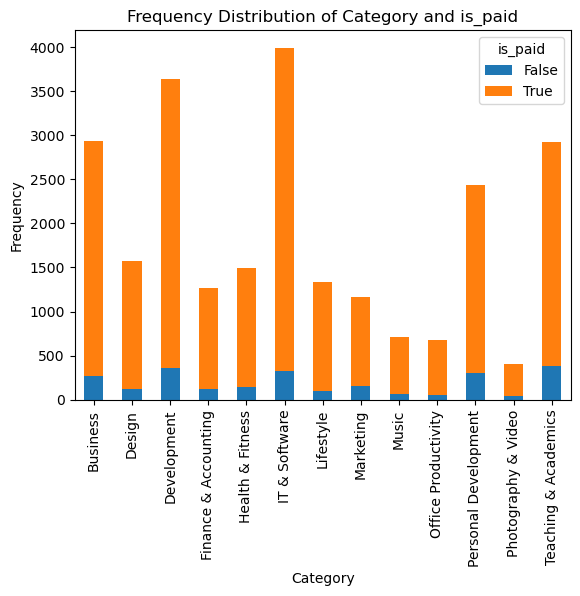

In [72]:
# Calculate the frequency distribution of 'category' and 'is_paid' together
category_is_paid_counts = df.groupby(['category', 'is_paid']).size().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
category_is_paid_counts.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Category and is_paid')
plt.legend(title='is_paid', loc='upper right')
plt.show()


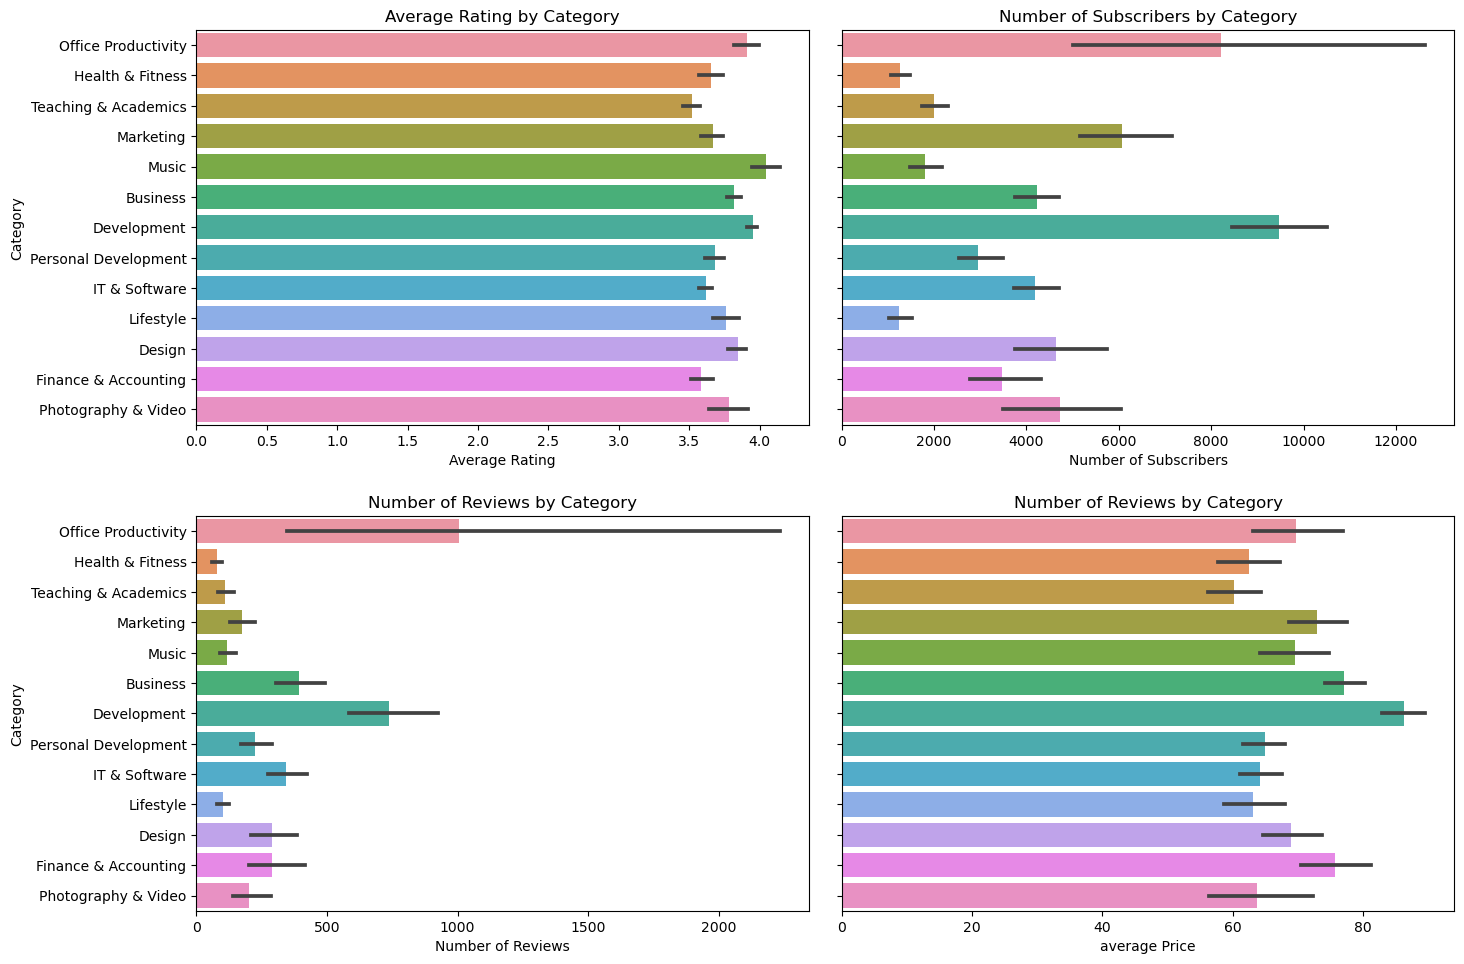

In [73]:
# Calculate the average rating, number of subscribers, and number of reviews for each category
category_stats = df.groupby('category').agg({'avg_rating': 'mean', 'num_subscribers': 'sum', 'num_reviews': 'sum',
                                             'price':'mean'})



# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# Plot the average rating
sns.barplot(x='avg_rating', y='category', data=df, ax=axes[0][0])
axes[0][0].set_xlabel('Average Rating')
axes[0][0].set_ylabel('Category')
axes[0][0].set_title('Average Rating by Category')

# Plot the number of subscribers
sns.barplot(x='num_subscribers', y='category', data=df, ax=axes[0][1])
axes[0][1].set_xlabel('Number of Subscribers')
axes[0][1].set_ylabel('')
axes[0][1].set_title('Number of Subscribers by Category')
axes[0][1].set_yticklabels([])

# Plot the number of reviews
sns.barplot(x='num_reviews', y='category', data=df, ax=axes[1][0])
axes[1][0].set_xlabel('Number of Reviews')
axes[1][0].set_ylabel('Category')
axes[1][0].set_title('Number of Reviews by Category')

# Plot the average cost
sns.barplot(x='price', y='category', data=df, ax=axes[1][1])
axes[1][1].set_xlabel('average Price')
axes[1][1].set_ylabel('')
axes[1][1].set_title('Number of Reviews by Category')
axes[1][1].set_yticklabels([])

# Adjust the spacing between subplots
plt.tight_layout(pad=2)

# Display the subplots
plt.show()


In [74]:
df['language'].nunique()

1

In [75]:
def popular_courses(df):
    

# Set the minimum reviews count, number of subscribers, and average rating thresholds
    min_reviews = 2000  # Minimum number of reviews required
    min_subs = 100000  # Minimum number of subscribers required
    min_avg_rating = 4.0  # Minimum average rating required

# Calculate the combined rating metric
    df['rating'] = (df['num_subscribers'] / min_subs) * (df['num_reviews'] / min_reviews) * df['avg_rating']

# Filter courses based on minimum average rating
    rated_courses = df[df['avg_rating'] >= min_avg_rating]

# Sort the courses by the rating in descending order
    rated_courses = rated_courses.sort_values(by='rating', ascending=False)
    return  rated_courses.head(15)

In [76]:
## popular _ courses
popular_courses(df)[['title','course_url']]

,title,course_url
8245,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...
6630,"React - The Complete Guide (incl Hooks, React ...",/course/react-the-complete-guide-incl-redux/
7581,Python for Data Science and Machine Learning B...,/course/python-for-data-science-and-machine-le...
24193,The Data Science Course 2022: Complete Data Sc...,/course/the-data-science-course-complete-data-...
17219,Learn Ethical Hacking From Scratch,/course/learn-ethical-hacking-from-scratch/
4498,iOS & Swift - The Complete iOS App Development...,/course/ios-13-app-development-bootcamp/
6921,The Ultimate MySQL Bootcamp: Go from SQL Begin...,/course/the-ultimate-mysql-bootcamp-go-from-sq...
24178,C++ Tutorial for Complete Beginners,/course/free-learn-c-tutorial-beginners/
2178,PMP Exam Prep Seminar - Complete Exam Coverage...,/course/pmp-pmbok6-35-pdus/
6068,Modern React with Redux,/course/react-redux/


In [77]:
# drop the Columns which are not Required

df=df.drop(['language','num_lectures','subcategory','instructor_url','content_length_min','num_comments'],axis=1)


In [78]:
# selected these columns as a feauture to find the similarity between the courses 

df['similar_text'] = df['topic'] + " " + df['title'] + " " + df['headline'] + " " + df['instructor_name']

In [79]:
# drop the Columns which are not Required

final_df=df.drop(['instructor_name'],axis=1)


In [80]:
final_df=final_df.reset_index(drop=True)

In [81]:
final_df['similar_text'][0]

'PowerPoint PowerPoint Slide Design - Casual Slides Presentation Create 5 PowerPoint Slides for any Presentation. Follow my PowerPoint Presentation & Animation Slide Tutorials Andrew Pach'

In [82]:
def data_conversion(x):
    l=[]
    print(x)
    for i in x.split():
        l.append(i.strip().lower())
        k=" ".join(l)
    return k

In [1]:
final_df['similar_text']=final_df['similar_text'].apply(data_conversion) 

NameError: name 'final_df' is not defined

In [84]:
final_df['similar_text'][0]

'powerpoint powerpoint slide design - casual slides presentation create 5 powerpoint slides for any presentation. follow my powerpoint presentation & animation slide tutorials andrew pach'

In [85]:
tfidf = TfidfVectorizer(stop_words='english')
courses_tfidf_matrix = tfidf.fit_transform(final_df['similar_text'])
cosine_similarities = cosine_similarity(courses_tfidf_matrix)

In [86]:
courses_tfidf_matrix.shape

(24538, 34493)

In [88]:
indices = pd.Series(final_df.index, index=final_df['id'])

(24538,)

In [89]:

def get_similar_courses(course_id, num_similar_courses):
    # Find the row index corresponding to the given course ID
    course_index = final_df[final_df['id'] == course_id].index[0]
    
    # Retrieve the similarity scores for the given course
    similarity_scores = cosine_similarities[course_index]
    
    # Sort the similarity scores in descending order
    sorted_indices = similarity_scores.argsort()[::-1]
    
    # Exclude the course itself if necessary
    if course_index in sorted_indices:
        sorted_indices = sorted_indices[0:]
    
    # Select the top N similar courses
    top_indices = sorted_indices[:num_similar_courses]
    
    # Return the list of similar course IDs
    similar_courses = final_df.loc[top_indices]
    return similar_courses[['title','is_paid','avg_rating','category','course_url']]


In [90]:
get_similar_courses(4779156,1)

,title,is_paid,avg_rating,category,course_url
3,How to Create and Sell A Brand And Marketing P...,True,0.0,Marketing,/course/brand-and-marketing-playbook/


In [91]:
df['id']

0         825218
1         245506
2        3350506
3        4779156
4        4637432
          ...   
24779    4831244
24780     503806
24781    4235918
24782    4076402
24783    2379384
Name: id, Length: 24538, dtype: int64

In [1]:
import pandas as pd # data cleaning and pre processing
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity #  finding similarity between the each course 
from sklearn.feature_extraction.text import TfidfVectorizer  # Converting to vectors
# read the dataset from  kaggle
df= pd.read_csv('udemy_data.csv')
def popular_courses(df):
    

# Set the minimum reviews count, number of subscribers, and average rating thresholds
    min_reviews = 2000  # Minimum number of reviews required
    min_subs = 100000  # Minimum number of subscribers required
    min_avg_rating = 4.0  # Minimum average rating required

# Calculate the combined rating metric
    df['rating'] = (df['num_subscribers'] / min_subs) * (df['num_reviews'] / min_reviews) * df['avg_rating']

# Filter courses based on minimum average rating
    rated_courses = df[df['avg_rating'] >= min_avg_rating]

# Sort the courses by the rating in descending order
    rated_courses = rated_courses.sort_values(by='rating', ascending=False)
    return  rated_courses.head(15)
# drop the Columns which are not Required

df=df.drop(['language','num_lectures','subcategory','instructor_url','content_length_min','num_comments','num_reviews'],axis=1)
# selected these columns as a feauture to find the similarity between the courses 

df['similar_text'] = df['topic'] + " " + df['title'] + " " + df['headline'] + " " + df['instructor_name']
# drop the Columns which are not Required

final_df=df.drop(['instructor_name'],axis=1)
final_df=final_df.reset_index(drop=True)
def data_conversion(x):
    l=[]
    for i in x.split():
        l.append(i.strip().lower())
        k=" ".join(l)
    return k
final_df['similar_text']=final_df['similar_text'].apply(data_conversion) 
tfidf = TfidfVectorizer(stop_words='english')
courses_tfidf_matrix = tfidf.fit_transform(final_df['similar_text'])
cosine_similarities = cosine_similarity(courses_tfidf_matrix)
indices = pd.Series(final_df.index, index=final_df['id'])
indices.shape

def get_similar_courses(course_id, num_similar_courses):
    # Find the row index corresponding to the given course ID
    course_index = final_df[final_df['id'] == course_id].index[0]
    
    # Retrieve the similarity scores for the given course
    similarity_scores = cosine_similarities[course_index]
    
    # Sort the similarity scores in descending order
    sorted_indices = similarity_scores.argsort()[::-1]
    
    # Exclude the course itself if necessary
    if course_index in sorted_indices:
        sorted_indices = sorted_indices[0:]
    
    # Select the top N similar courses
    top_indices = sorted_indices[:num_similar_courses]
    
    # Return the list of similar course IDs
    similar_courses = final_df.loc[top_indices]
    return similar_courses[['title','is_paid','avg_rating','category','course_url']]
get_similar_courses(4779156,10)



AttributeError: 'float' object has no attribute 'split'

In [52]:
final_df

,id,title,is_paid,price,headline,num_subscribers,avg_rating,published_time,last_update_date,category,topic,course_url,rating,similar_text
0,825218,PowerPoint Slide Design - Casual Slides Presen...,False,0.00,Create 5 PowerPoint Slides for any Presentatio...,89574,4.586538,2016-04-19T18:27:55Z,21-02-2022,Office Productivity,PowerPoint,/course/powerpoint-slide-design/,1.145201e+01,powerpoint powerpoint slide design - casual sl...
1,245506,Prevent pregnancy naturally - with personal co...,True,199.99,Fertility awareness is a scientifically proven...,17,5.000000,2015-01-28T16:42:04Z,27-10-2017,Health & Fitness,Fertility,/course/naturalfertility/,4.250000e-07,fertility prevent pregnancy naturally - with p...
2,3350506,ENGLISH MADE EASY GCSE,False,0.00,An Overview of the AQA English Literature GCSE...,2400,3.850000,2020-07-25T03:40:45Z,21-07-2020,Teaching & Academics,English Literature,/course/english-made-easy-gcse/,6.468000e-04,english literature english made easy gcse an o...
3,4779156,How to Create and Sell A Brand And Marketing P...,True,149.99,Create a brand and marketing playbook for your...,6,0.000000,2022-08-26T03:30:23Z,24-08-2022,Marketing,Business Branding,/course/brand-and-marketing-playbook/,0.000000e+00,business branding how to create and sell a bra...
4,4637432,Sound Sleep Meditation,True,19.99,"Improve your sleep, decrease your stress and f...",1336,4.714286,2022-04-12T14:48:51Z,12-04-2022,Health & Fitness,Meditation,/course/sound-sleep-meditation/,2.204400e-04,meditation sound sleep meditation improve your...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24533,4831244,Microsoft SC-300 Exclusive Exam Preparation - NEW,True,79.99,Exam SC-300: Microsoft Identity and Access Adm...,1007,5.000000,2022-08-22T05:20:41Z,20-08-2022,IT & Software,Microsoft SC-300,/course/microsoft-sc-300-exclusive-exam-prepar...,2.517500e-05,microsoft sc-300 microsoft sc-300 exclusive ex...
24534,503806,How to Create Abundance & Raise Vibration by S...,True,24.99,Amazing Chants with proper pronunciation and m...,5390,4.700000,2015-05-31T23:09:38Z,11-09-2022,Personal Development,Sanskrit Language,/course/sanskrit-chanting-for-happiness-and-pr...,2.127972e-02,sanskrit language how to create abundance & ra...
24535,4235918,Interested in world History: Let's learn about...,True,19.99,"Let's learn about facts on Mesopotamia, world’...",8,2.750000,2021-09-29T02:34:47Z,28-09-2021,Teaching & Academics,World History,/course/interested-in-world-history-lets-learn...,2.200000e-07,world history interested in world history: let...
24536,4076402,"Ethnicity, Justice, and the People of God",True,59.99,An Exploration into a Biblical Theology of Jus...,1356,4.770834,2022-01-08T19:03:28Z,18-03-2022,Teaching & Academics,The Bible,/course/ethnicity-justice-and-the-people-of-god/,7.989524e-03,"the bible ethnicity, justice, and the people o..."


In [92]:
import pickle
# Save the data
with open('data.pkl', 'wb') as f:
    pickle.dump(final_df, f)

# Save the cosine similarity matrix
with open('cosine_similarity.pkl', 'wb') as f:
    pickle.dump(cosine_similarities, f)


In [54]:
final_df['id']

0         825218
1         245506
2        3350506
3        4779156
4        4637432
          ...   
24533    4831244
24534     503806
24535    4235918
24536    4076402
24537    2379384
Name: id, Length: 24538, dtype: int64

In [57]:
final_df=pd.read_pickle('data.pkl')

In [58]:
final_df

,id,title,is_paid,price,headline,num_subscribers,avg_rating,published_time,last_update_date,category,topic,course_url,rating,similar_text
0,825218,PowerPoint Slide Design - Casual Slides Presen...,False,0.00,Create 5 PowerPoint Slides for any Presentatio...,89574,4.586538,2016-04-19T18:27:55Z,21-02-2022,Office Productivity,PowerPoint,/course/powerpoint-slide-design/,1.145201e+01,powerpoint powerpoint slide design - casual sl...
1,245506,Prevent pregnancy naturally - with personal co...,True,199.99,Fertility awareness is a scientifically proven...,17,5.000000,2015-01-28T16:42:04Z,27-10-2017,Health & Fitness,Fertility,/course/naturalfertility/,4.250000e-07,fertility prevent pregnancy naturally - with p...
2,3350506,ENGLISH MADE EASY GCSE,False,0.00,An Overview of the AQA English Literature GCSE...,2400,3.850000,2020-07-25T03:40:45Z,21-07-2020,Teaching & Academics,English Literature,/course/english-made-easy-gcse/,6.468000e-04,english literature english made easy gcse an o...
3,4779156,How to Create and Sell A Brand And Marketing P...,True,149.99,Create a brand and marketing playbook for your...,6,0.000000,2022-08-26T03:30:23Z,24-08-2022,Marketing,Business Branding,/course/brand-and-marketing-playbook/,0.000000e+00,business branding how to create and sell a bra...
4,4637432,Sound Sleep Meditation,True,19.99,"Improve your sleep, decrease your stress and f...",1336,4.714286,2022-04-12T14:48:51Z,12-04-2022,Health & Fitness,Meditation,/course/sound-sleep-meditation/,2.204400e-04,meditation sound sleep meditation improve your...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24533,4831244,Microsoft SC-300 Exclusive Exam Preparation - NEW,True,79.99,Exam SC-300: Microsoft Identity and Access Adm...,1007,5.000000,2022-08-22T05:20:41Z,20-08-2022,IT & Software,Microsoft SC-300,/course/microsoft-sc-300-exclusive-exam-prepar...,2.517500e-05,microsoft sc-300 microsoft sc-300 exclusive ex...
24534,503806,How to Create Abundance & Raise Vibration by S...,True,24.99,Amazing Chants with proper pronunciation and m...,5390,4.700000,2015-05-31T23:09:38Z,11-09-2022,Personal Development,Sanskrit Language,/course/sanskrit-chanting-for-happiness-and-pr...,2.127972e-02,sanskrit language how to create abundance & ra...
24535,4235918,Interested in world History: Let's learn about...,True,19.99,"Let's learn about facts on Mesopotamia, world’...",8,2.750000,2021-09-29T02:34:47Z,28-09-2021,Teaching & Academics,World History,/course/interested-in-world-history-lets-learn...,2.200000e-07,world history interested in world history: let...
24536,4076402,"Ethnicity, Justice, and the People of God",True,59.99,An Exploration into a Biblical Theology of Jus...,1356,4.770834,2022-01-08T19:03:28Z,18-03-2022,Teaching & Academics,The Bible,/course/ethnicity-justice-and-the-people-of-god/,7.989524e-03,"the bible ethnicity, justice, and the people o..."


In [59]:
with open('cosine_similarity.pkl', 'rb') as f:
    cosine_similarities = pickle.load(f)

In [60]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])